In [1]:
from pandas import DataFrame as df
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'Malgun Gothic'

import json
import folium

In [2]:
#2017년
test1 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_2017년_1.csv', parse_dates=["'대여일자'"],encoding='CP949')
test2 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_2017년_2.csv', parse_dates=["'대여일자'"],encoding='CP949')
test3 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_2017년_3.csv', parse_dates=["'대여일자'"],encoding='CP949')
test4 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_2017년_4.csv', parse_dates=["'대여일자'"],encoding='CP949')
test5 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_2017년_5.csv', parse_dates=["'대여일자'"],encoding='CP949')
test6 = pd.read_csv('data/서울특별시 공공자전거 이용정보(시간대별)_2017년_6.csv', parse_dates=["'대여일자'"],encoding='CP949')

In [3]:
test2017=pd.concat([test1,test2,test3,test4,test5,test6]) #데이터 합침
test2017.head()

,'대여일자','대여시간','대여소번호','대여소','대여구분코드','성별','연령대코드','이용건수','운동량','탄소량','이동거리(M)','이동시간(분)'
0,2017-01-01,'00','230',' 영등포구청역 1번출구','정기','F','~10대',1,31.27,0.39,1680,155
1,2017-01-01,'00','315',' 신한은행 안국역지점 옆','정기','F','20대',1,47.32,0.55,2390,15
2,2017-01-01,'00','328',' 탑골공원 앞','정기','F','20대',1,57.92,0.52,2250,13
3,2017-01-01,'00','175',' 홍연2교옆','정기','F','20대',1,133.29,1.53,6600,43
4,2017-01-01,'00','817',' 삼각지역 4번출구 앞','정기','F','20대',1,33.88,0.32,1380,8


In [4]:
test2017.tail()

,'대여일자','대여시간','대여소번호','대여소','대여구분코드','성별','연령대코드','이용건수','운동량','탄소량','이동거리(M)','이동시간(분)'
599191,2017-12-31,'23','502',' 뚝섬유원지역 1번출구 앞','일일(비회원)','',NaN,1,96.01,0.87,3730,104
599192,2017-12-31,'23','512',' 뚝섬역 1번 출구 옆','일일(비회원)','M',NaN,1,207.98,1.87,8080,48
599193,2017-12-31,'23','1022',' 길동 사거리(초소앞)','단체','F','20대',3,439.09,4.60,19800,160
599194,2017-12-31,'23','540',' 군자역 7번출구 베스트샵 앞','단체','M','30대',2,581.53,4.55,19580,191
599195,2017-12-31,'23','1245',' 문정 법조단지9','단체','M','30대',2,613.62,4.23,18230,142


In [5]:
test2017["'대여시간'"]

0         '00'
1         '00'
2         '00'
3         '00'
4         '00'
          ... 
599191    '23'
599192    '23'
599193    '23'
599194    '23'
599195    '23'
Name: '대여시간', Length: 4196232, dtype: object

In [6]:
test2017.shape

(4196232, 12)

In [7]:
test2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4196232 entries, 0 to 599195
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   '대여일자'     datetime64[ns]
 1   '대여시간'     object        
 2   '대여소번호'    object        
 3   '대여소'      object        
 4   '대여구분코드'   object        
 5   '성별'       object        
 6   '연령대코드'    object        
 7   '이용건수'     int64         
 8   '운동량'      float64       
 9   '탄소량'      float64       
 10  '이동거리(M)'  int64         
 11  '이동시간(분)'  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 416.2+ MB


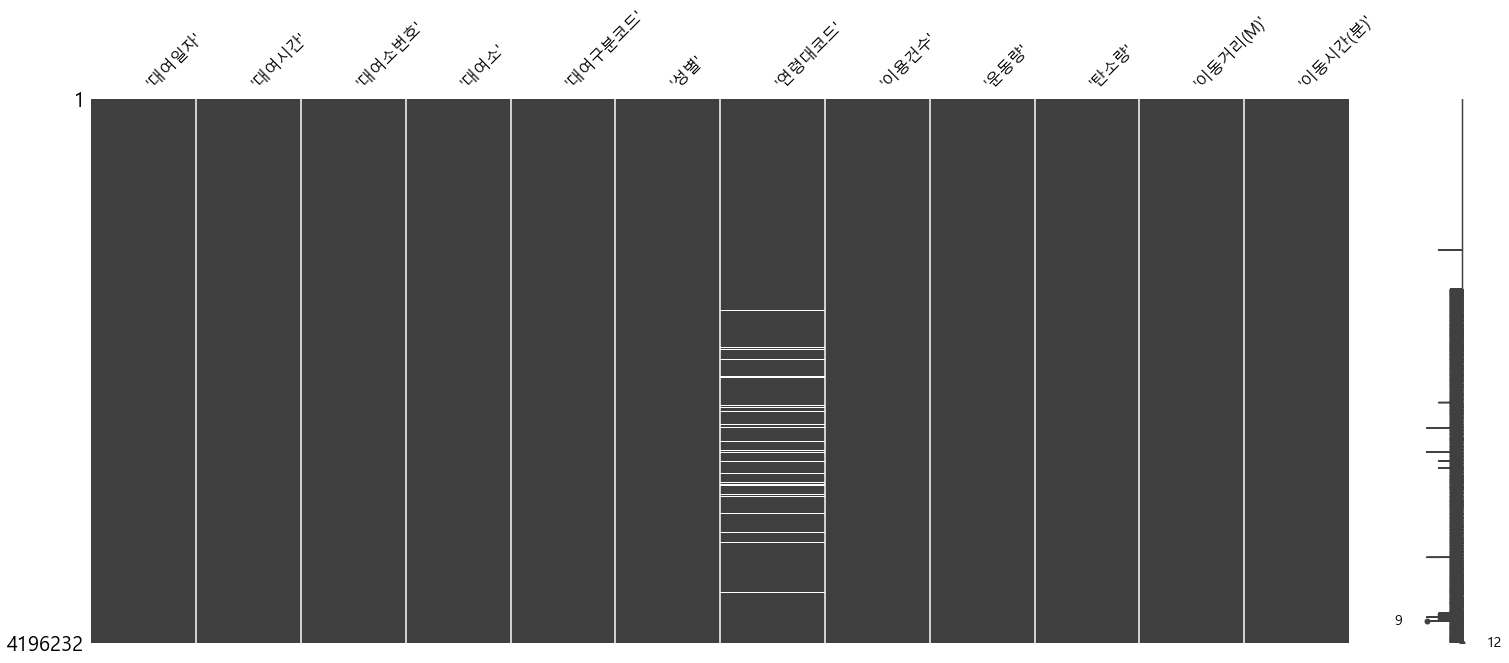

In [8]:
msno.matrix(test2017) #결측치 확인
plt.show()

In [9]:
#확인해보니 결측 아님
test2017.isnull()

,'대여일자','대여시간','대여소번호','대여소','대여구분코드','성별','연령대코드','이용건수','운동량','탄소량','이동거리(M)','이동시간(분)'
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
599191,False,False,False,False,False,False,True,False,False,False,False,False
599192,False,False,False,False,False,False,True,False,False,False,False,False
599193,False,False,False,False,False,False,False,False,False,False,False,False
599194,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
test2017['월']=test2017["'대여일자'"].dt.month
test2017['일']=test2017["'대여일자'"].dt.day
test2017['요일']=test2017["'대여일자'"].dt.dayofweek

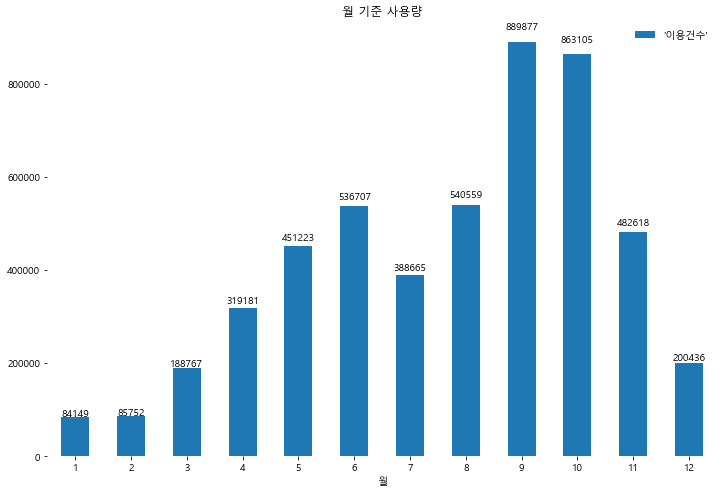

In [11]:
month = test2017.groupby(['월'])[["'이용건수'"]].agg('sum')
ax=month.plot(kind='bar', figsize=(12, 8), rot=0, title="월 기준 사용량")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)
plt.show()

In [12]:
dayofweek = test2017.groupby(["요일"])[["'이용건수'"]].agg('sum')

In [13]:
#day 데이터에 요일 컬럼 추가
#월:0, 화:1, 수:2, 목:3, 금:4, 토:5, 일:6
add_today=['월','화','수','목','금','토','일']
dayofweek['today']=add_today

In [14]:
dayofweek

,'이용건수',today
요일,,
0,707740,월
1,731684,화
2,714292,수
3,752597,목
4,750002,금
5,724111,토
6,650613,일


In [15]:
#요일 순서가 이상하게 나옴...
week = dayofweek.groupby(['today'])[["'이용건수'"]].agg('sum')
week

,'이용건수'
today,
금,750002
목,752597
수,714292
월,707740
일,650613
토,724111
화,731684


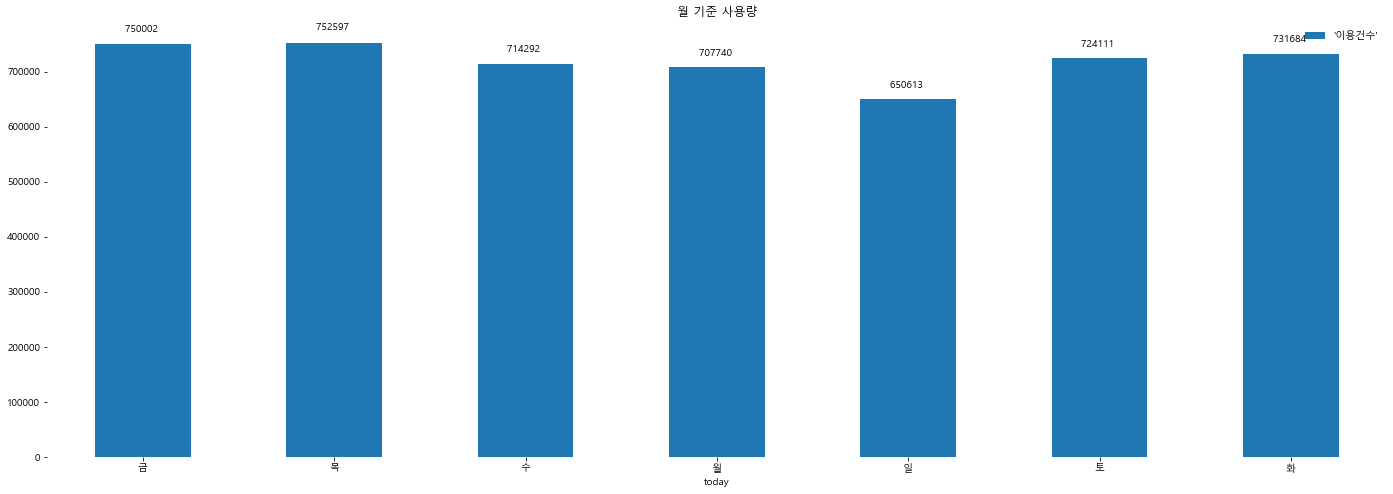

In [16]:
#월:0, 화:1, 수:2, 목:3, 금:4, 토:5, 일:6
week = dayofweek.groupby(['today'])[["'이용건수'"]].agg('sum')
ax=week.plot(kind='bar', figsize=(24, 8), rot=0, title="월 기준 사용량")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d "%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)
plt.show()

In [17]:
#메모리 에러나서 해줌
# del test2017

In [18]:
#자전거 이용현황 시간별 데이터와 자전거 교통사고 시간별 데이터 기준이 달라서 같게 만들어야함
#자전거 교통사고를 기준으로 데이터 만들기로 함
time=test2017.groupby(["'대여시간'"])[["'이용건수'"]].count()
time

,'이용건수'
'대여시간',
'00',124464
'01',95193
'02',66532
'03',44341
'04',30014
'05',32915
'06',63779
'07',143838
'08',237421


In [19]:
#자전거 이용시간 데이터를 교통사고 데이터처럼 합치는 작업
time1=time.iloc[0]+time.iloc[1]
time2=time.iloc[2]+time.iloc[3]
time3=time.iloc[4]+time.iloc[5]
time4=time.iloc[6]+time.iloc[7]
time5=time.iloc[8]+time.iloc[9]
time6=time.iloc[10]+time.iloc[11]
time7=time.iloc[12]+time.iloc[13]
time8=time.iloc[14]+time.iloc[15]
time9=time.iloc[16]+time.iloc[17]
time10=time.iloc[18]+time.iloc[19]
time11=time.iloc[20]+time.iloc[21]
time12=time.iloc[22]+time.iloc[23]

In [20]:
#새로운 시간대별 자전거 교통사고 데이터 프레임 생성
data=["00시~02시","02시~04시","04시~06시","06시~08시","08시~10시","10시~12시","12시~14시","14시~16시","16시~18시","18시~20시","20시~22시","22시~24시"]
time_df=df([time1,time2,time3,time4,time5,time6,time7,time8,time9,time10,time11,time12])
time_df['시간']=df(data)

In [21]:
time_df

,'이용건수',시간
0,219657,00시~02시
1,110873,02시~04시
2,62929,04시~06시
3,207617,06시~08시
4,393110,08시~10시
5,280609,10시~12시
6,362091,12시~14시
7,413751,14시~16시
8,522645,16시~18시
9,688842,18시~20시


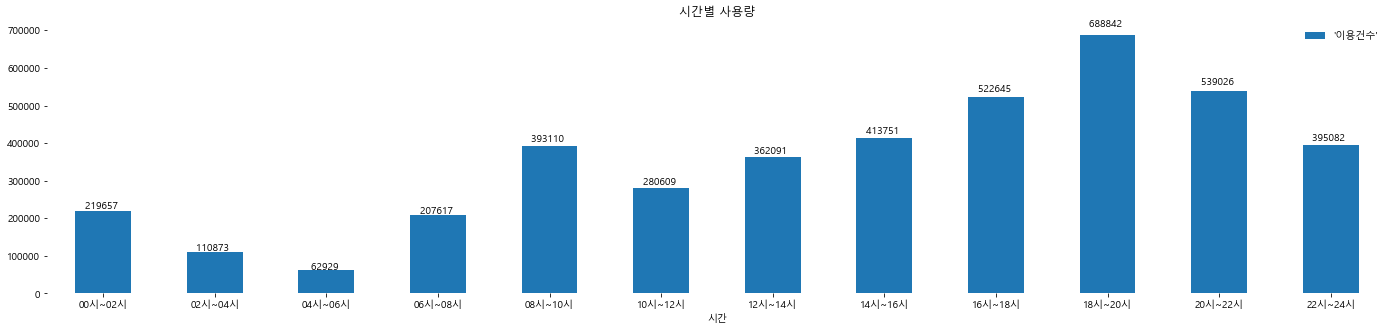

In [22]:
bicycle_time=time_df.groupby(["시간"])[["'이용건수'"]].agg('sum')
ax=bicycle_time.plot(kind='bar', figsize=(24, 5), rot=0, title="시간별 사용량")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d "%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)
plt.show()

In [23]:
accident2017_month=pd.read_csv('data/2017교통사고_월.csv',encoding='CP949')
accident2017_day=pd.read_csv('data/2017교통사고_요일.csv',encoding='CP949')
accident2017_time=pd.read_csv('data/2017교통사고_시간.csv',encoding='CP949')

In [24]:
accident2017_month

,월,사고건수,사망자수,부상자수
0,1,67,2,68
1,2,64,0,67
2,3,135,4,139
3,4,137,1,143
4,5,191,0,213
5,6,208,1,224
6,7,162,2,172
7,8,171,3,188
8,9,184,1,198
9,10,167,0,182


In [25]:
accident2017_day

,요일,사고건수,사망자수,부상자수,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,일,200.0,1.0,215.0,NaN,NaN,NaN,NaN,NaN,NaN
1,월,230.0,1.0,242.0,NaN,NaN,NaN,NaN,NaN,NaN
2,화,223.0,2.0,240.0,NaN,NaN,NaN,NaN,NaN,NaN
3,수,230.0,3.0,249.0,NaN,NaN,NaN,NaN,NaN,NaN
4,목,246.0,5.0,264.0,NaN,NaN,NaN,NaN,NaN,NaN
5,금,258.0,0.0,275.0,NaN,NaN,NaN,NaN,NaN,NaN
6,토,269.0,4.0,291.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
accident2017_time

,시간,사고건수,사망자수,부상자수
0,00시~02시,31,0,32
1,02시~04시,17,0,19
2,04시~06시,31,2,29
3,06시~08시,102,1,110
4,08시~10시,206,4,214
5,10시~12시,153,3,157
6,12시~14시,168,1,177
7,14시~16시,236,3,262
8,16시~18시,237,0,261
9,18시~20시,220,1,237


In [27]:
accident2017_month=accident2017_month.dropna(how='all',axis=1)
accident2017_day=accident2017_day.dropna(how='all',axis=1)
accident2017_time=accident2017_time.dropna(how='all',axis=1)

In [28]:
accident2017_month

,월,사고건수,사망자수,부상자수
0,1,67,2,68
1,2,64,0,67
2,3,135,4,139
3,4,137,1,143
4,5,191,0,213
5,6,208,1,224
6,7,162,2,172
7,8,171,3,188
8,9,184,1,198
9,10,167,0,182


In [29]:
accident2017_day=accident2017_day.dropna(how='all',axis=0)
accident2017_day

,요일,사고건수,사망자수,부상자수
0,일,200.0,1.0,215.0
1,월,230.0,1.0,242.0
2,화,223.0,2.0,240.0
3,수,230.0,3.0,249.0
4,목,246.0,5.0,264.0
5,금,258.0,0.0,275.0
6,토,269.0,4.0,291.0


In [30]:
accident2017_time

,시간,사고건수,사망자수,부상자수
0,00시~02시,31,0,32
1,02시~04시,17,0,19
2,04시~06시,31,2,29
3,06시~08시,102,1,110
4,08시~10시,206,4,214
5,10시~12시,153,3,157
6,12시~14시,168,1,177
7,14시~16시,236,3,262
8,16시~18시,237,0,261
9,18시~20시,220,1,237


In [31]:
accident2017_month.info()
accident2017_day.info()
accident2017_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   월       12 non-null     int64
 1   사고건수    12 non-null     int64
 2   사망자수    12 non-null     int64
 3   부상자수    12 non-null     int64
dtypes: int64(4)
memory usage: 512.0 bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   요일      7 non-null      object 
 1   사고건수    7 non-null      float64
 2   사망자수    7 non-null      float64
 3   부상자수    7 non-null      float64
dtypes: float64(3), object(1)
memory usage: 280.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시간      12 non-null     object
 1   사고건수    12 non-null     int64 
 2   사망자수    12 non-

In [32]:
accident2017_day['사고건수']=accident2017_day['사고건수'].astype(int)
accident2017_day['사망자수']=accident2017_day['사망자수'].astype(int)
accident2017_day['부상자수']=accident2017_day['부상자수'].astype(int)

In [33]:
accident2017_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요일      7 non-null      object
 1   사고건수    7 non-null      int32 
 2   사망자수    7 non-null      int32 
 3   부상자수    7 non-null      int32 
dtypes: int32(3), object(1)
memory usage: 196.0+ bytes


In [34]:
ac_month=accident2017_month.groupby(['월'])[['사고건수']].agg('sum')
ac_month

,사고건수
월,
1,67
2,64
3,135
4,137
5,191
6,208
7,162
8,171
9,184


In [35]:
month = test2017.groupby(['월'])[["'이용건수'"]].agg('sum')
month

,'이용건수'
월,
1,84149
2,85752
3,188767
4,319181
5,451223
6,536707
7,388665
8,540559
9,889877


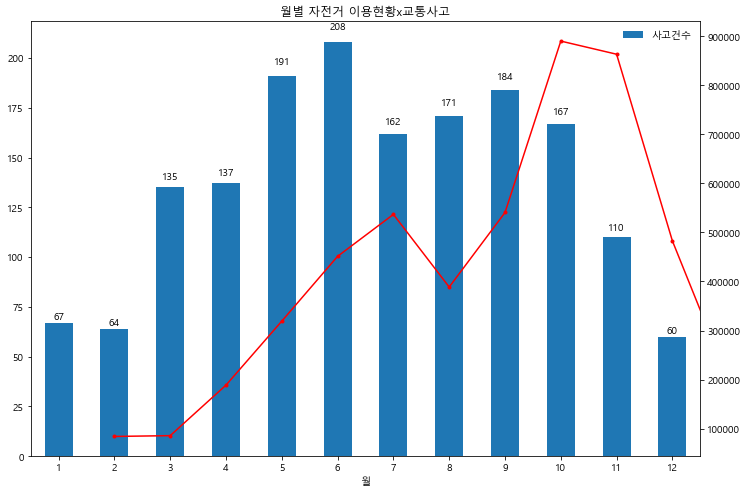

In [36]:
#월별 자전거 이용x교통사고
ac_month=accident2017_month.groupby(['월'])[['사고건수']].agg('sum')
ax=ac_month.plot(kind='bar', figsize=(12, 8), rot=0, title="월별 자전거 이용현황x교통사고")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)

plt.twinx() # bar 그래프와 plot 그래프 합치기
plt.plot(month,'r.-')
plt.show()

In [37]:
month.shape

(12, 1)

In [38]:
ac_month.shape

(12, 1)

In [39]:
ac_day=accident2017_day.groupby(['요일'])[['사고건수']].agg('sum')
ac_day

,사고건수
요일,
금,258
목,246
수,230
월,230
일,200
토,269
화,223


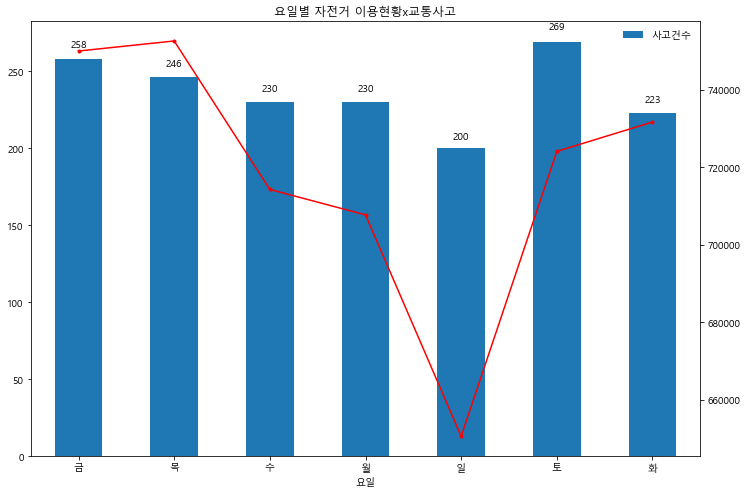

In [40]:
#요일별 자전거 이용x교통사고
ac_day=accident2017_day.groupby(['요일'])[['사고건수']].agg('sum')
ax=ac_day.plot(kind='bar', figsize=(12, 8), rot=0, title="요일별 자전거 이용현황x교통사고")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)

plt.twinx() # bar 그래프와 plot 그래프 합치기
plt.plot(week,'r.-')
plt.show()

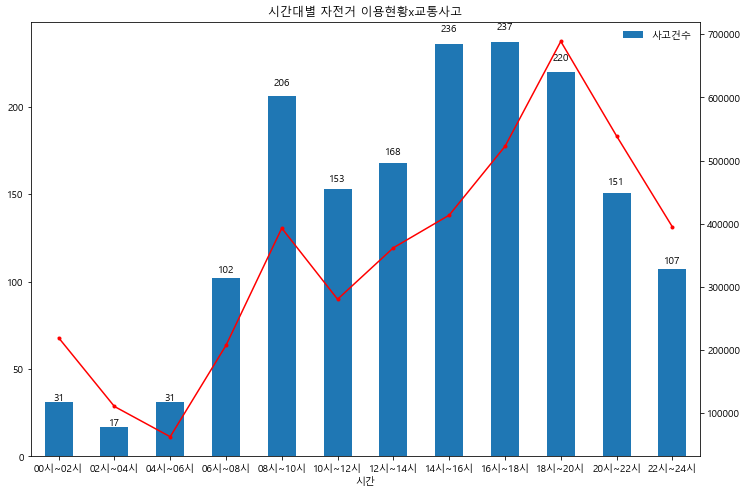

In [41]:
#시간대별 자전거 이용x교통사고
ac_time=accident2017_time.groupby(['시간'])[['사고건수']].agg('sum')
ax=ac_time.plot(kind='bar', figsize=(12, 8), rot=0, title="시간대별 자전거 이용현황x교통사고")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.legend(frameon=False)

plt.twinx() # bar 그래프와 plot 그래프 합치기
plt.plot(bicycle_time,'r.-')
plt.show()

In [43]:
ac_time

,사고건수
시간,
00시~02시,31
02시~04시,17
04시~06시,31
06시~08시,102
08시~10시,206
10시~12시,153
12시~14시,168
14시~16시,236
16시~18시,237


In [44]:
bicycle_time

,'이용건수'
시간,
00시~02시,219657
02시~04시,110873
04시~06시,62929
06시~08시,207617
08시~10시,393110
10시~12시,280609
12시~14시,362091
14시~16시,413751
16시~18시,522645


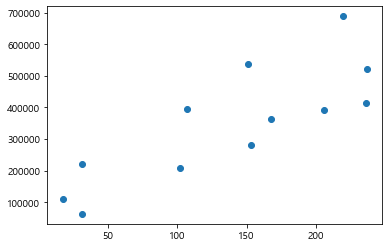

In [48]:
#시간대별 자전거 이용현황과 시간대별 자전거 사고가 연관이 있는거 같아
#상관관계 분석을 해봄
plt.scatter(ac_time["사고건수"], bicycle_time["'이용건수'"])
plt.show()

In [50]:
#공분산이란, 두개의 변수 즉 x와 y간에 서로 얼마나 같은 방향으로 변화하는지를 나타내는 값이다. 
#x값이 증가할 때 y값도 증가한다면 공분산은 0보다 큰 양(+)의 값이 될 것이고, 
#x값이 증가할때 y 값이 감소한다면 공분산은 음(-) 값을 가지게 될 것이다.

np.cov(bicycle_time["'이용건수'"],ac_time["사고건수"])
#공분산은 1.21056394e+07 => 공분산이 0보다 크기 때문에 x증가하면 y증가 하는 경향이 존재함

array([[3.36472629e+10, 1.21056394e+07],
       [1.21056394e+07, 6.53111364e+03]])

In [45]:
#피어슨 상관계수 도출
#+0.7과 +1.0 사이이면, 강한 양적 선형관계
bicycle_time["'이용건수'"].corr(ac_time["사고건수"])

0.8166185498354772

In [59]:
np.corrcoef(bicycle_time["'이용건수'"],ac_time["사고건수"])

array([[1.        , 0.81661855],
       [0.81661855, 1.        ]])

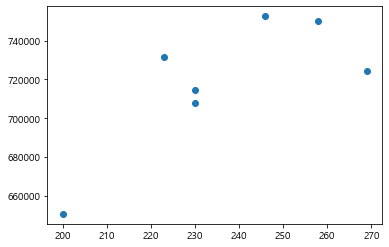

array([[5.34619048e+02, 5.96774262e+05],
       [5.96774262e+05, 1.18367898e+09]])

In [55]:
#요일별 상관관계 분석을 해봄
plt.scatter(ac_day["사고건수"], week["'이용건수'"])
plt.show()
#공분산
np.cov(ac_day["사고건수"], week["'이용건수'"])

In [56]:
#상관관계
ac_day["사고건수"].corr(week["'이용건수'"])

0.7501893651169784

In [60]:
np.corrcoef(ac_day["사고건수"], week["'이용건수'"])

array([[1.        , 0.75018937],
       [0.75018937, 1.        ]])

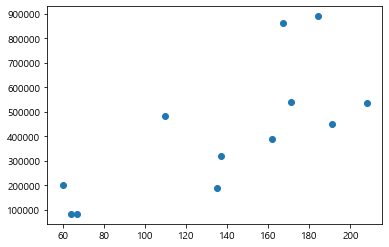

array([[2.70236364e+03, 1.02056438e+07],
       [1.02056438e+07, 7.15919685e+10]])

In [57]:
#월별 상관관계 분석을 해봄
plt.scatter(ac_month["사고건수"], month["'이용건수'"])
plt.show()
#공분산
np.cov(ac_month["사고건수"], month["'이용건수'"])

In [58]:
#상관관계
ac_month["사고건수"].corr(month["'이용건수'"])

0.7337301429046995

In [61]:
np.corrcoef(ac_month["사고건수"], month["'이용건수'"])

array([[1.        , 0.73373014],
       [0.73373014, 1.        ]])